# Euler's method

The simplest numerical method. We want to solve the IVP

$$ \frac{dy}{dt} = f(t,y) $$

at $y(t_0) = y_0$.

We start with the equation of the line tangent to the solution curve, where the slope m is simply $f(t,y)$ and the step size $h = (t-t_0)$

$$ y(t) = y_0 + m (t-t_0) = y_0 + h f(t,y)$$

And more generally, for the next approximated point we have Euler's method

$$ y_{n+1} = y_n + h f(t_n, y_n) $$

## Example 

Suppose we want to solve 

$$ y' = 2 - 2y - e^{-4t} $$

for y(0) = 1. Let's do it in python, first step by step and then more programatically. To check that our Euler method approximation is correct, we can compare it to the exact solution: 

$$ y = 1 + \frac{1}{2} e^{-4t} - \frac{1}{2} e^{-2t} $$

In [30]:
import numpy as np
import plotly.graph_objects as go

In [36]:
# define our function
def f(t, y):
    return 2 - 2*y - np.exp(-4*t)

# exact solution

def exact_f(t):
    return 1 + 1/2 * np.exp(-4*t) - 1/2 * np.exp(-2*t)

# initial conditions
y0 = 1
t0 = 0 
step = 0.1

# crank out the next point
y1 = y0 + step * f(t0, y0)
print(y1)

0.9


In [37]:
t1 = t0 + step
y2 = y1 + step * f(t1, y1)
print(y2)

0.8529679953964361


In [38]:
t2 = t1 + step
y3 = y2 + step * f(t2, y2)
print(y3)

0.8374414999054267


In [43]:
# now, more programatically we can define 100 time steps to iterate through
t = np.arange(0, 100*step, step)  # gives exact 0.1 increments
sol = np.zeros(len(t) + 1)
sol[0] = y0 # set initial value to be y0

for i, time in enumerate(t):
    sol[i+1] = sol[i] + step * f(time, sol[i])

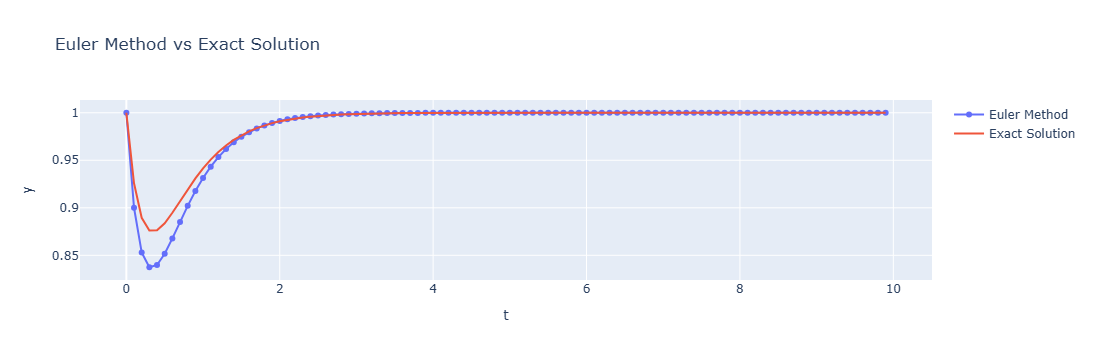

In [46]:
# plot our approximation vs exact solution
y_exact = exact_f(t)

fig = go.Figure()

# Euler's method
fig.add_trace(go.Scatter(x=t, y=sol, 
                         mode='lines+markers', name='Euler Method'))

# exact solution
fig.add_trace(go.Scatter(x=t, y=y_exact, 
                         mode='lines', name='Exact Solution'))

fig.update_layout(title='Euler Method vs Exact Solution',
                  xaxis_title='t',
                  yaxis_title='y')
fig.show()

# Runge-Kutta

Euler's method is a bit too elementary for real world astrodynamics work. 